<a href="https://colab.research.google.com/github/nikeshgamal24/Power-Transformation-Feature-Engineering/blob/main/Power_Transformation_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [8]:
data  = pd.read_csv('concrete_data.csv')

In [9]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [11]:
data.shape

(1030, 9)

In [12]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [14]:
X = data.drop(columns=['Strength'])
y = data.iloc[:,-1]

In [15]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [16]:
y.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [17]:
## train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape , X_test.shape

((824, 8), (206, 8))

In [19]:
y_train.shape , y_test.shape

((824,), (206,))

In [20]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


In [21]:
# applying the regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [22]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.46099404916628606)

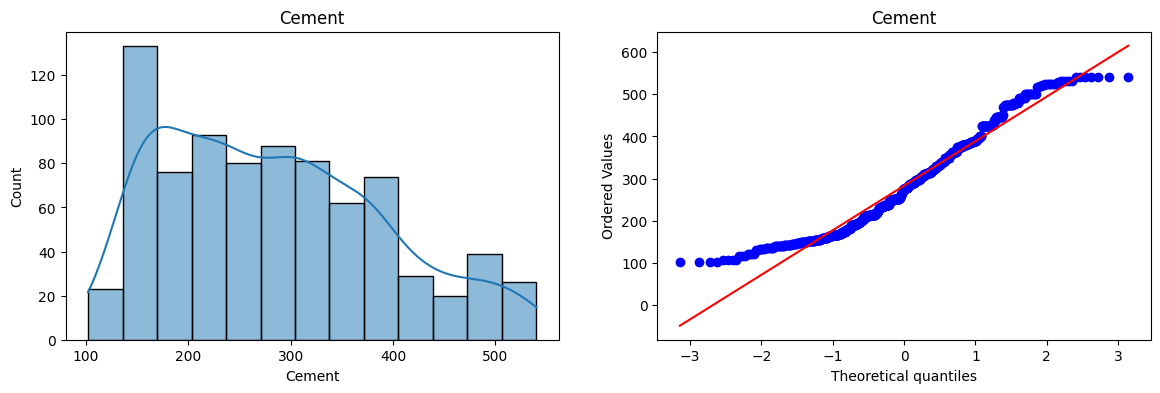

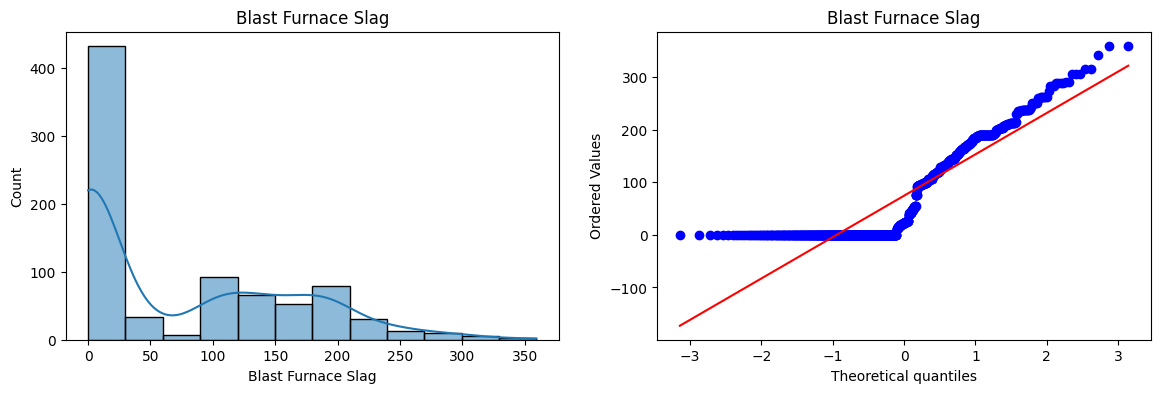

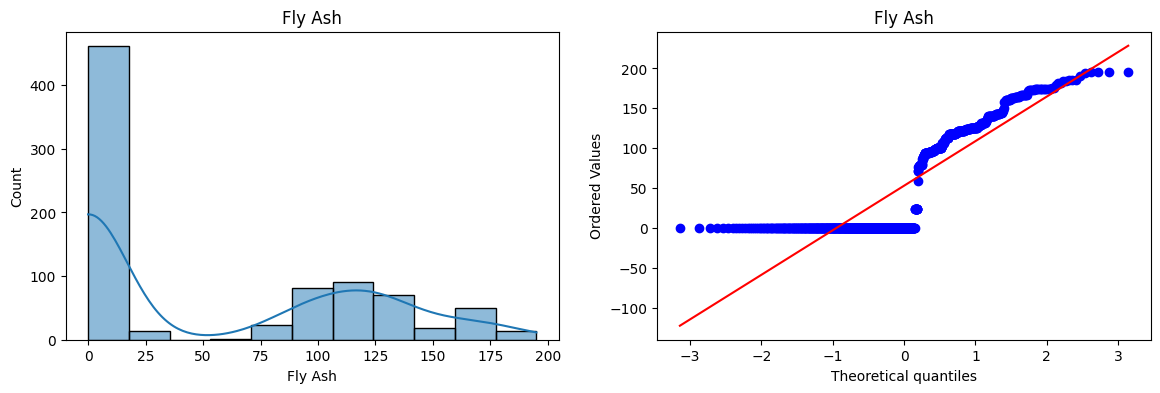

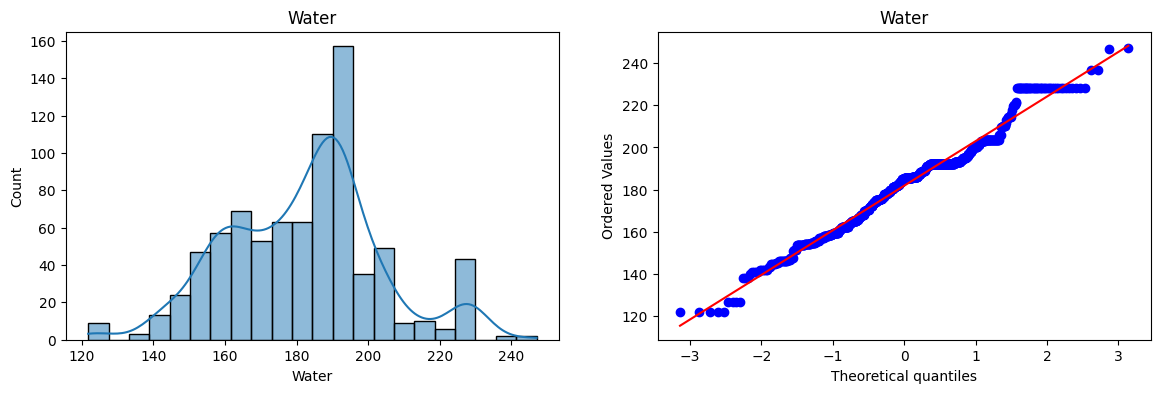

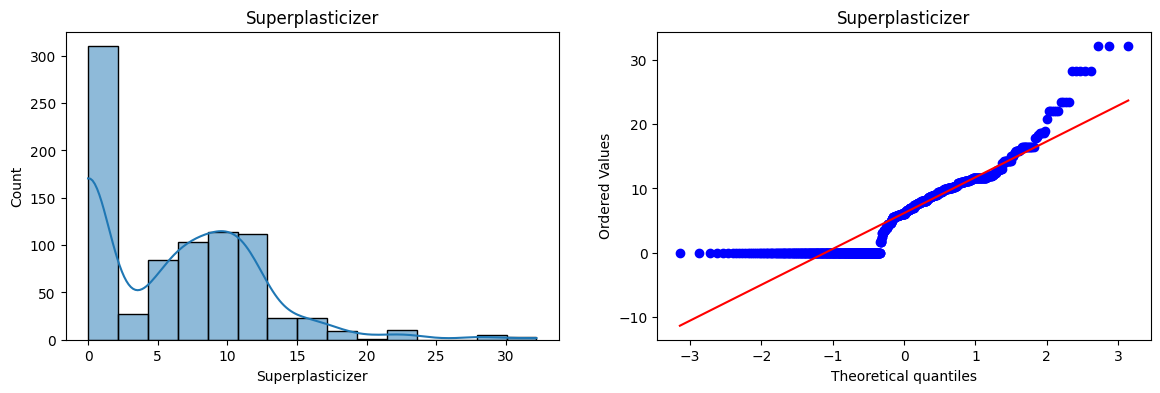

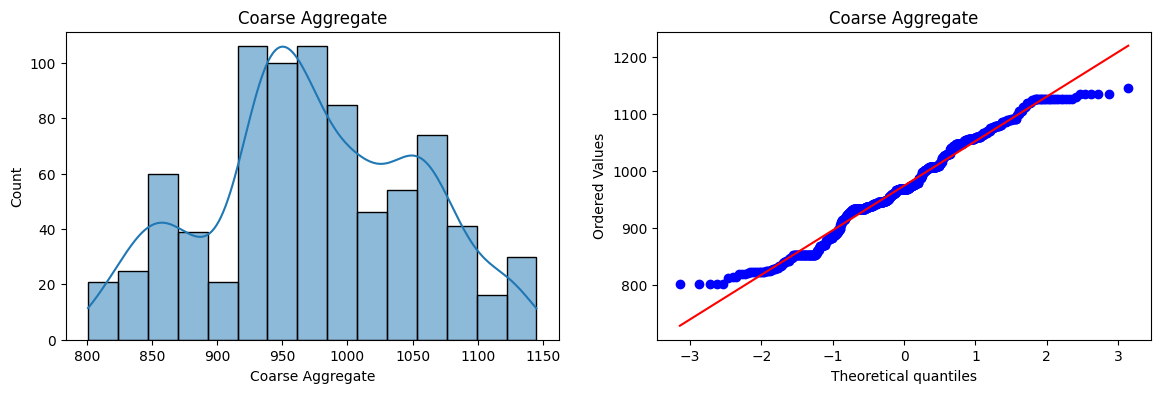

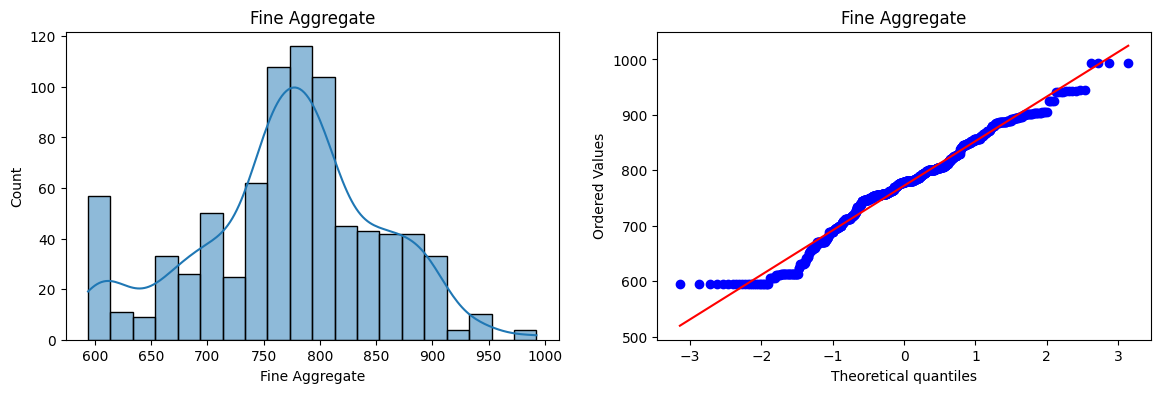

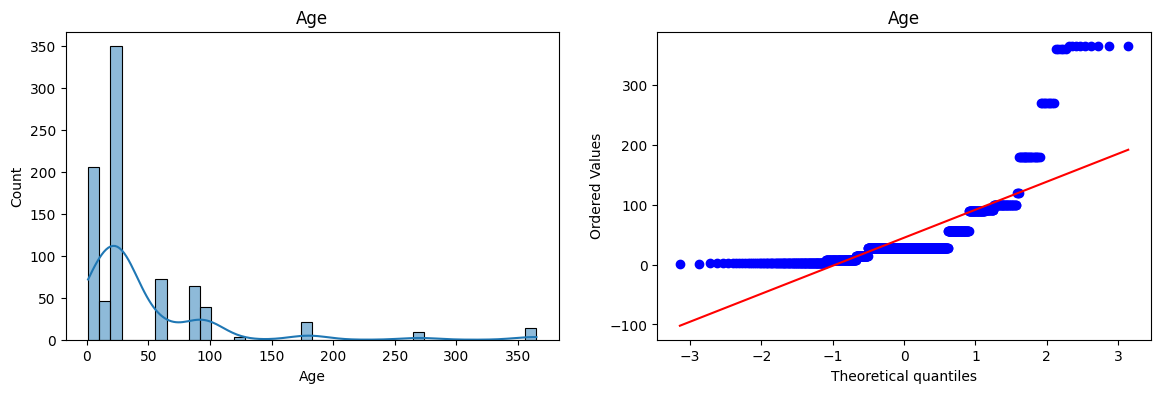

In [23]:
## Plotting the histogram plots for comparisons
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

## Applying Box Cox Transformation

In [24]:
pt = PowerTransformer(method="box-cox")

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

In [26]:
## Applying Regression on transformed Data
lr = LinearRegression()

lr.fit(X_train_transformed,y_train)

y_pred1 = lr.predict(X_test_transformed)
r2_score(y_test,y_pred1)

0.8047824993083206

In [27]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6658537935432477)

In [29]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

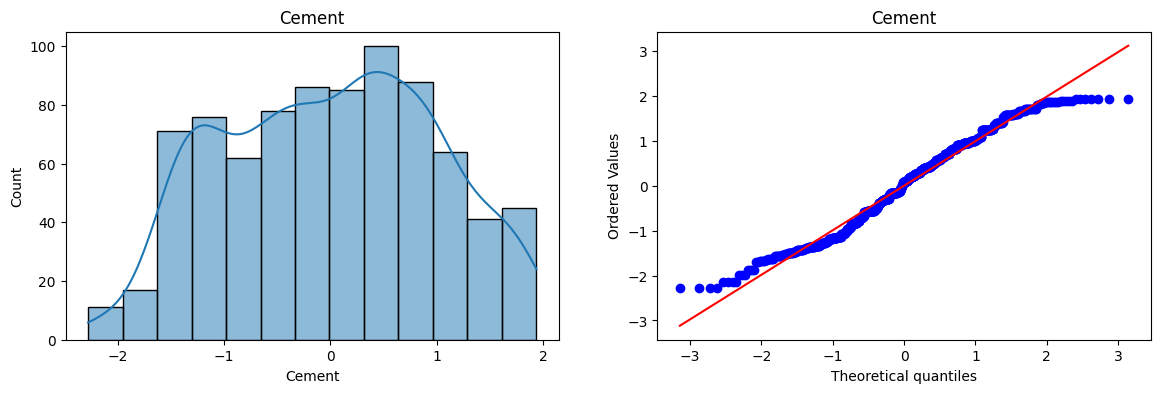

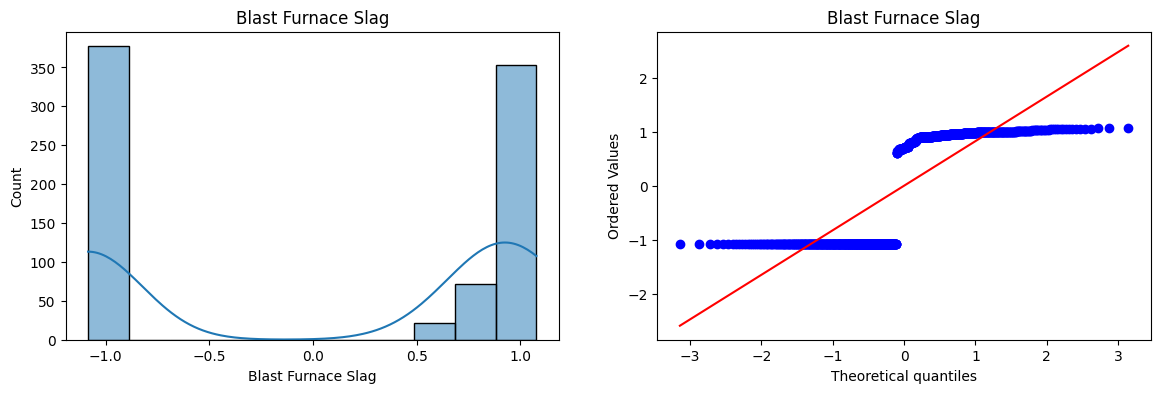

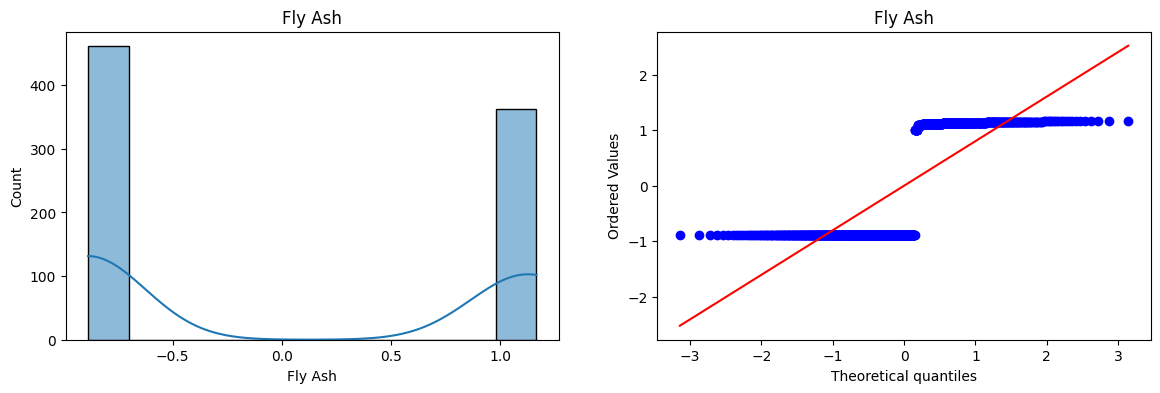

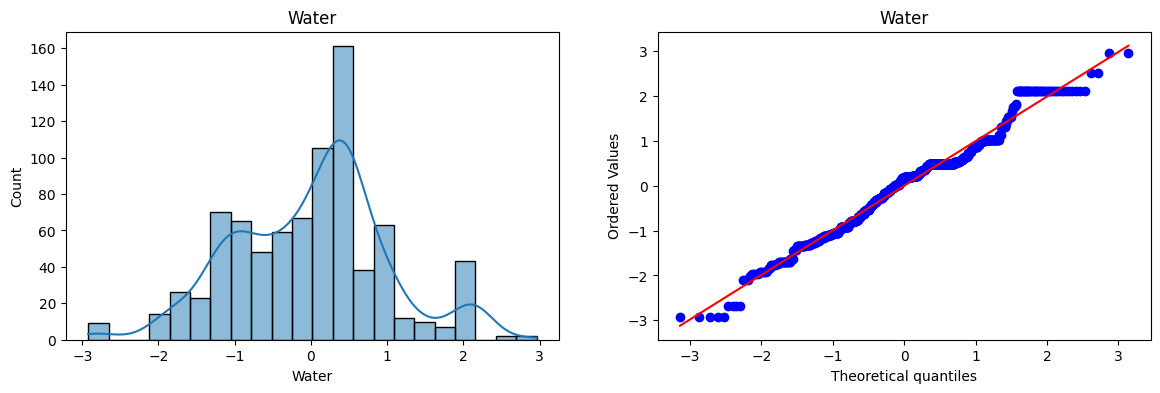

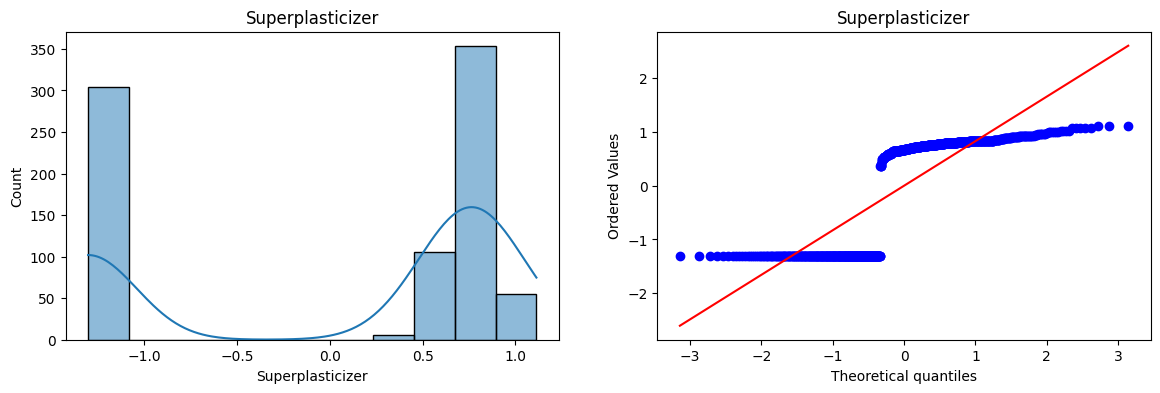

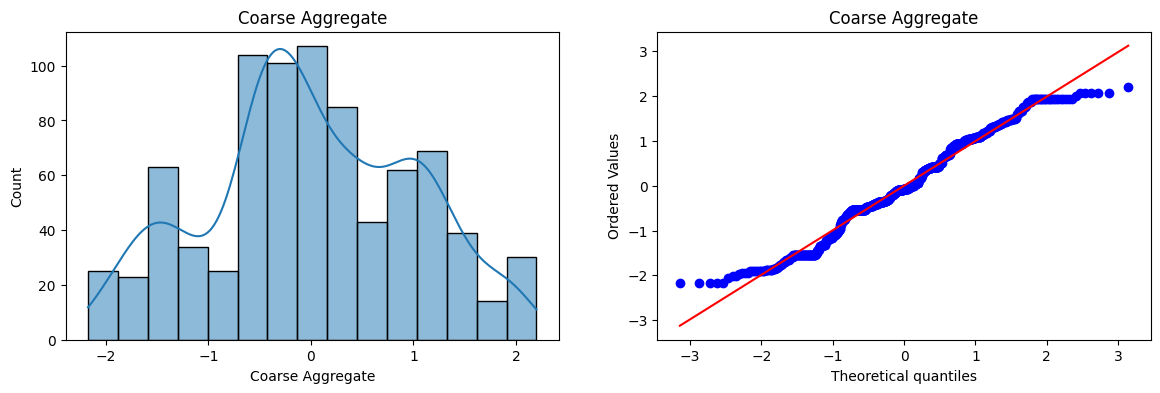

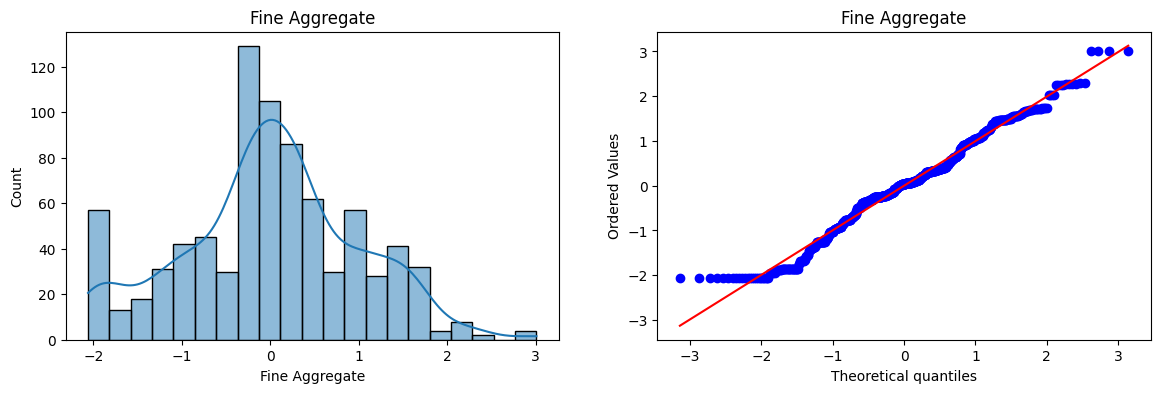

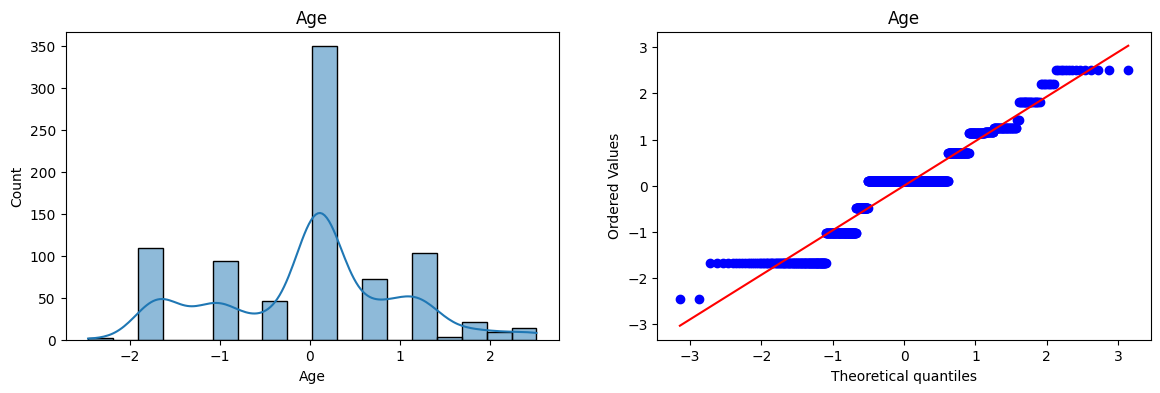

In [30]:
## before and after comparison for box -cox plot
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_transformed[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

## Applying Yeo-Johnson Transformation

In [35]:
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

In [36]:
## Applying Regression on transformed Data
lr = LinearRegression()

lr.fit(X_train_transformed,y_train)

y_pred1 = lr.predict(X_test_transformed)
r2_score(y_test,y_pred1)

0.8161906512004999

In [37]:
# Using cross val score

pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6834625141500866)

In [38]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

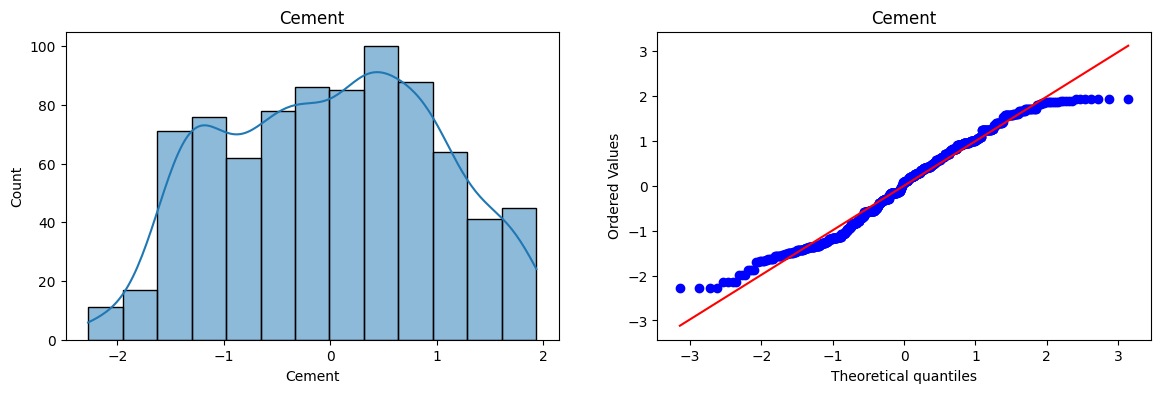

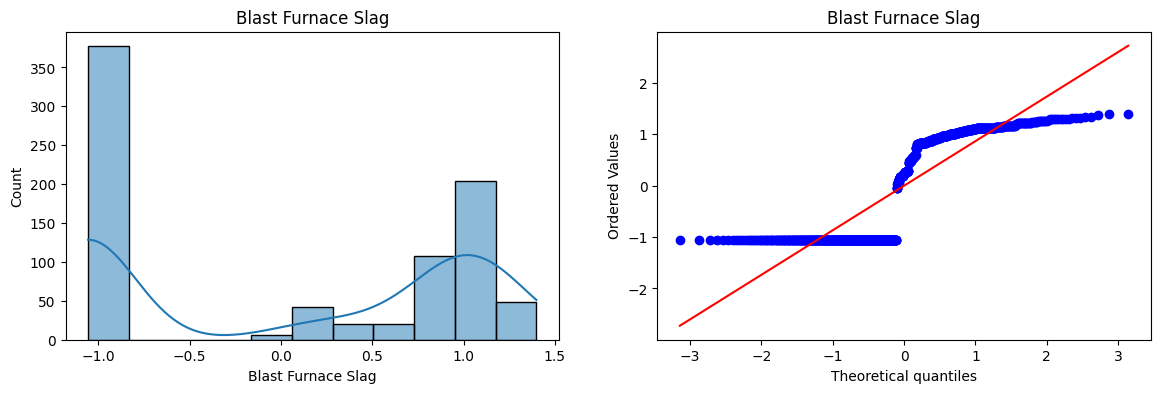

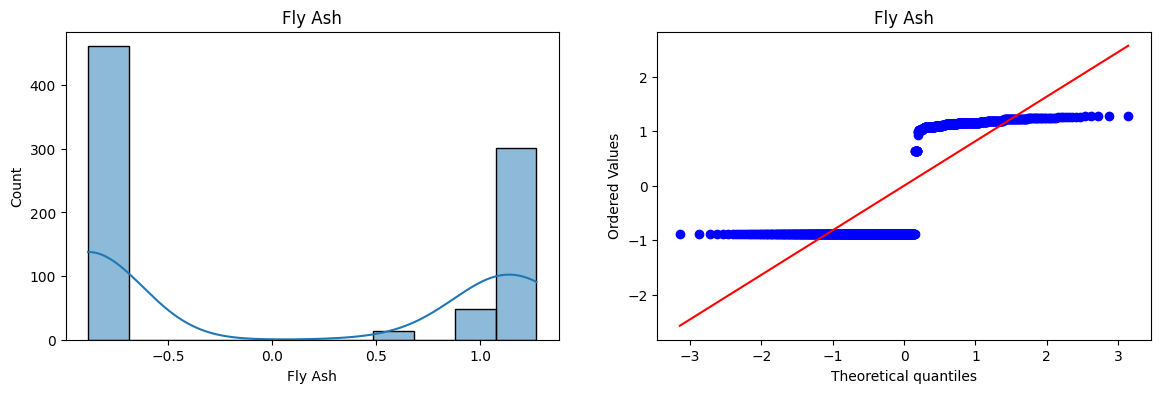

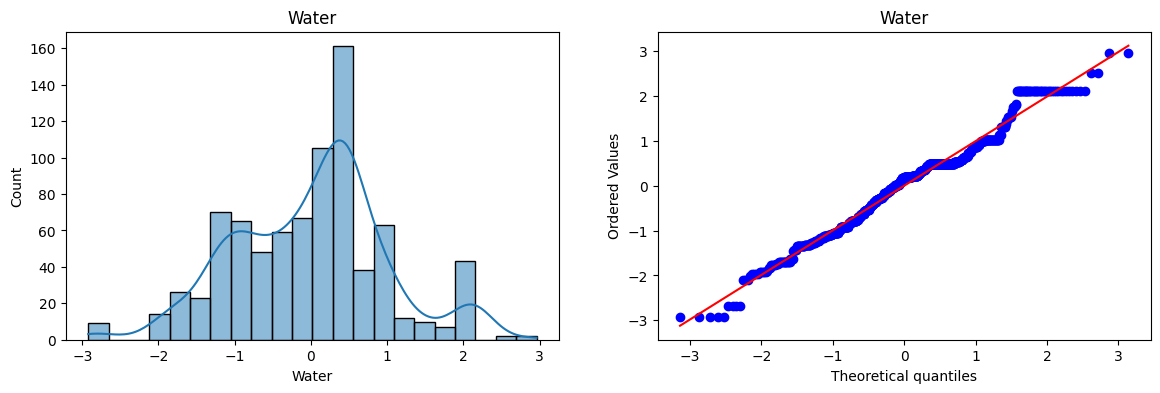

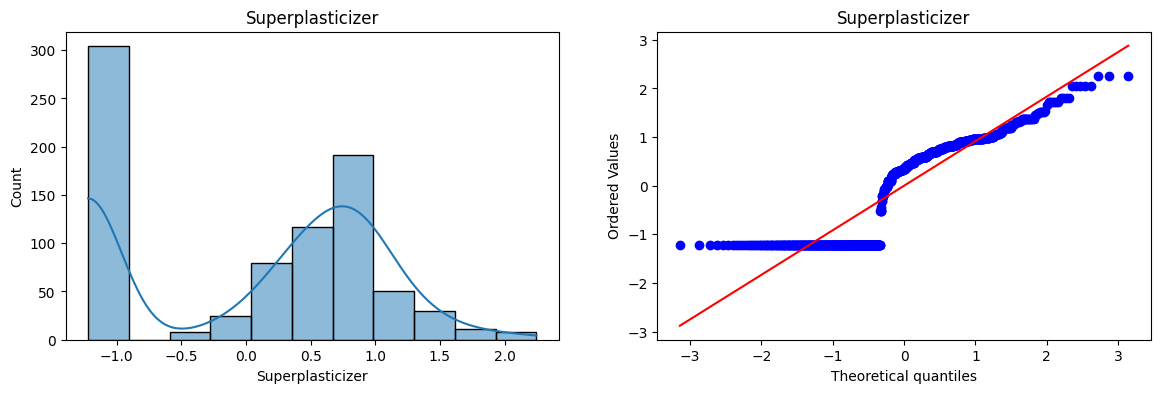

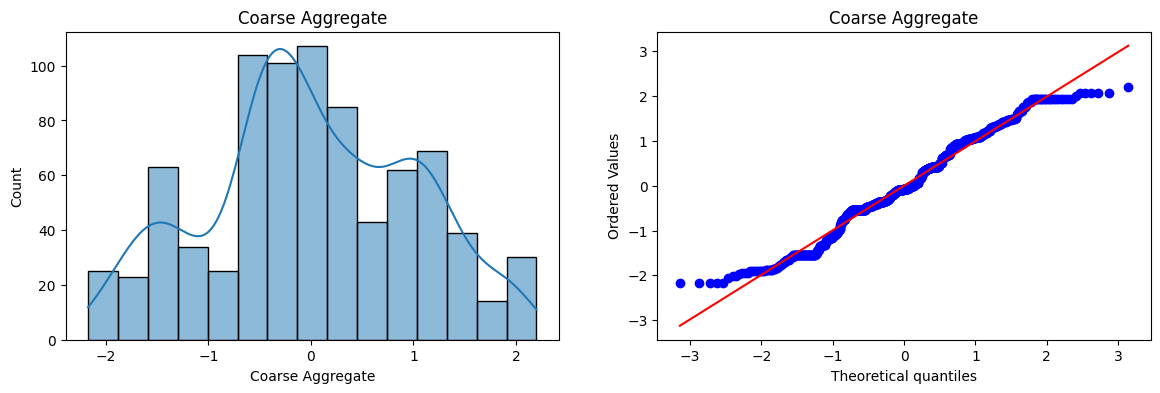

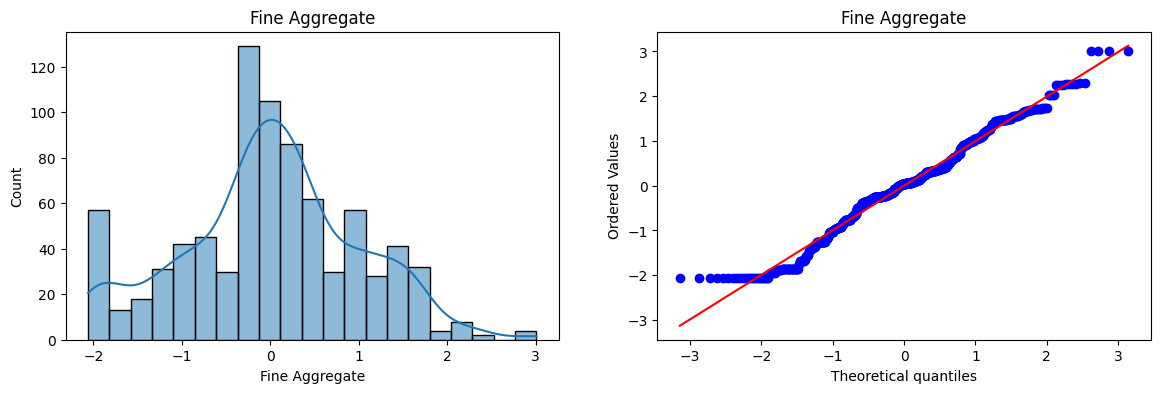

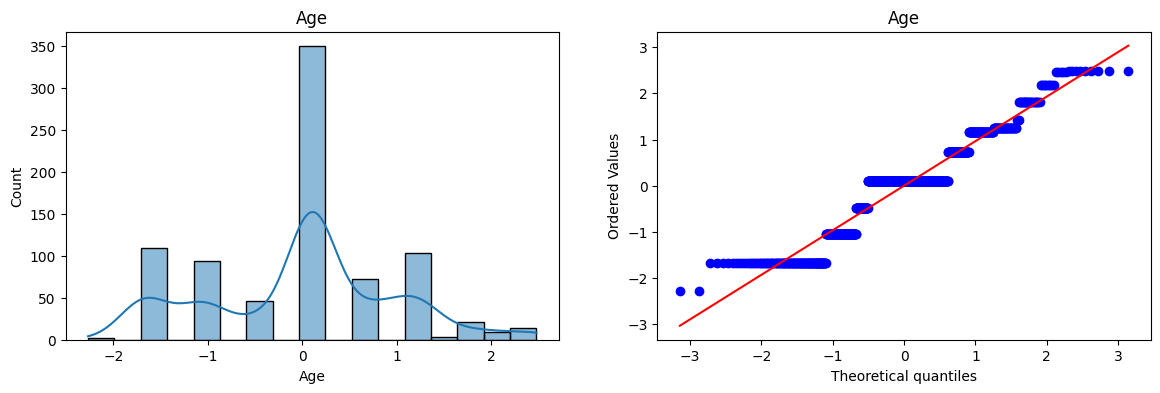

In [39]:
## before and after comparison for box -cox plot
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_transformed[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()